In [ ]:
import os
import sys

# os.environ["CUDA_VISIBLE_DEVICES"]="-1"
lib_path = os.path.abspath("").replace("notebooks", "src")
sys.path.append(lib_path)

import torch
import matplotlib.pyplot as plt
import umap
from transformers import BertTokenizer
from data.dataloader import build_train_test_dataset
from tqdm.auto import tqdm
import numpy as np
from models import networks
from transformers import BertTokenizer, RobertaTokenizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from configs.base import Config
root_path = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))

In [2]:
def eval_pca(cfg, checkpoint_path, all_state_dict=True, three_dim=False, legend=False):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    try:
        network = getattr(networks, cfg.model_type)(cfg)
        network.to(device)
    except AttributeError:
        raise NotImplementedError("Model {} is not implemented".format(cfg.model_type))

    # Build dataset
    # Build dataset
    encoder_model = None
    
    
    train_ds, _ = build_train_test_dataset(cfg, encoder_model)
    weight = torch.load(checkpoint_path, map_location=torch.device(device))
    if all_state_dict:
        weight = weight["state_dict_network"]
    network.load_state_dict(weight)
    network.eval()
    network.to(device)

    # Get train features
    X = []
    y = []
    # count = 0
    for every_train_list in tqdm(train_ds):
        # if count==100:
        #     break
        # count+=1
        input_ids, audio, label = every_train_list
        input_ids = input_ids.to(device)
        audio = audio.to(device)
        label = label.to(device)
        with torch.no_grad():
            feature = network(input_ids,audio)[1].detach().cpu().numpy()[0]
            feature_norm = feature / np.linalg.norm(feature)
            X.append(feature_norm)
            y.append(label.detach().cpu().numpy()[0])
    # if not three_dim:
    #     # SVM
    #     pca = PCA(n_components=2)
    #     X_transformed = pca.fit_transform(X)
    #     fig = plt.figure(figsize=(5, 5))
    #     # 2D plot
    #     ax = fig.add_subplot(111)
    #     scatter = ax.scatter(X_transformed[:,0], X_transformed[:,1], c=y)
    #     # remove ticks
    #     ax.xaxis.set(ticks=())
    #     ax.yaxis.set(ticks=())
    
    #     # add legend
    #     if legend:
    #         legend1 = ax.legend(*scatter.legend_elements(),
    #                             loc="upper left", title="")
    #         legend1.get_texts()[0].set_text('Angry')
    #         legend1.get_texts()[1].set_text('Happy')
    #         legend1.get_texts()[2].set_text('Sad')
    #         legend1.get_texts()[3].set_text('Neutral')
    #         ax.add_artist(legend1)
    
    #     # remove spines
    #     for spine in ax.spines.values():
    #         spine.set_visible(False)
    #     plt.tight_layout()
    #     plt.savefig(f"{cfg.name}_pca.png", dpi=300, bbox_inches='tight')
    #     plt.show()

    #     # TSNE
    #     X_transformed = TSNE(n_components=2).fit_transform(np.array(X))
    #     fig = plt.figure(figsize=(5, 5))
    #     # 2D plot
    #     ax = fig.add_subplot(111)
    #     scatter = ax.scatter(X_transformed[:,0], X_transformed[:,1], c=y)
    #     # remove ticks
    #     ax.xaxis.set(ticks=())
    #     ax.yaxis.set(ticks=())
    
    #     # add legend
    #     if legend:
    #         legend1 = ax.legend(*scatter.legend_elements(),
    #                             loc="upper left", title="")
    #         legend1.get_texts()[0].set_text('Angry')
    #         legend1.get_texts()[1].set_text('Happy')
    #         legend1.get_texts()[2].set_text('Sad')
    #         legend1.get_texts()[3].set_text('Neutral')
    #         ax.add_artist(legend1)
    
    #     # remove spines
    #     for spine in ax.spines.values():
    #         spine.set_visible(False)
    #     plt.tight_layout()
    #     plt.savefig(f"TSNE_{cfg.name}.png", dpi=300, bbox_inches='tight')
    #     plt.show()
    # else:
    #     # SVM
    #     pca = PCA(n_components=3)
    #     X_transformed = pca.fit_transform(X)
    #     fig = plt.figure(figsize=(5, 5))
    #     # 3D plot
    #     ax = fig.add_subplot(111, projection='3d')
    #     scatter = ax.scatter(X_transformed[:,0], X_transformed[:,1], X_transformed[:,2], c=y)
    #     # remove ticks
    #     ax.xaxis.set(ticks=())
    #     ax.yaxis.set(ticks=())
    #     ax.zaxis.set(ticks=())
        
    #     if legend:
    #         legend1 = ax.legend(*scatter.legend_elements(),
    #                             loc="upper left", title="")
    #         legend1.get_texts()[0].set_text('Angry')
    #         legend1.get_texts()[1].set_text('Happy')
    #         legend1.get_texts()[2].set_text('Sad')
    #         legend1.get_texts()[3].set_text('Neutral')
    #         ax.add_artist(legend1)
        
    #     # remove spines
    #     for spine in ax.spines.values():
    #         spine.set_visible(False)
    #     plt.tight_layout()
    #     plt.savefig(f"PCA_{cfg.name}.png", dpi=300, bbox_inches='tight')
    #     plt.show()

    #     # TSNE
    #     X_transformed = TSNE(n_components=3).fit_transform(np.array(X))
    #     fig = plt.figure(figsize=(5, 5))
    #     # 3D plot
    #     ax = fig.add_subplot(111, projection='3d')
    #     scatter = ax.scatter(X_transformed[:,0], X_transformed[:,1], X_transformed[:,2], c=y)
    #     # remove ticks
    #     ax.xaxis.set(ticks=())
    #     ax.yaxis.set(ticks=())
    #     ax.zaxis.set(ticks=())
        
    #     if legend:
    #         legend1 = ax.legend(*scatter.legend_elements(),
    #                             loc="upper left", title="")
    #         legend1.get_texts()[0].set_text('Angry')
    #         legend1.get_texts()[1].set_text('Happy')
    #         legend1.get_texts()[2].set_text('Sad')
    #         legend1.get_texts()[3].set_text('Neutral')
    #         ax.add_artist(legend1)
        
    #     # remove spines
    #     for spine in ax.spines.values():
    #         spine.set_visible(False)
    #     plt.tight_layout()
    #     plt.savefig(f"TSNE_{cfg.name}.png", dpi=300, bbox_inches='tight')
    #     plt.show()

    # Umap
    X_transformed = umap.UMAP().fit_transform(X)
    fig = plt.figure(figsize=(5, 5))
    # 2D plot
    ax = fig.add_subplot(111)
    scatter = ax.scatter(X_transformed[:,0], X_transformed[:,1], c=y)
    # remove ticks
    ax.xaxis.set(ticks=())
    ax.yaxis.set(ticks=())

    if legend:
        legend1 = ax.legend(*scatter.legend_elements(),
                            loc="upper left", title="")
        legend1.get_texts()[0].set_text('Angry')
        legend1.get_texts()[1].set_text('Happy')
        legend1.get_texts()[2].set_text('Sad')
        legend1.get_texts()[3].set_text('Neutral')
        ax.add_artist(legend1)
    
    # remove spines
    for spine in ax.spines.values():
        spine.set_visible(False)
    plt.tight_layout()
    plt.savefig(f"UMAP_{cfg.name}.png", dpi=300, bbox_inches='tight')
    plt.show()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 4479/4479 [03:31<00:00, 21.18it/s]


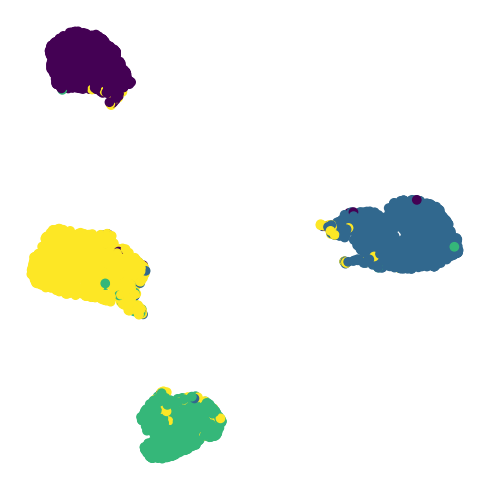

In [3]:
checkpoint_path = "checkpoints_latest/IEMOCAP_losses/_4M_SER_ArcFace_bert_vggish/20240320-152614"
cfg_path = os.path.join(checkpoint_path, "cfg.log")
ckpt_path = os.path.join(
    checkpoint_path, "weights/best_acc/checkpoint_0.pth"
)
cfg = Config()
cfg.load(cfg_path)

        
eval_pca(cfg, ckpt_path, three_dim=True, legend=False, all_state_dict=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 4479/4479 [04:00<00:00, 18.64it/s]


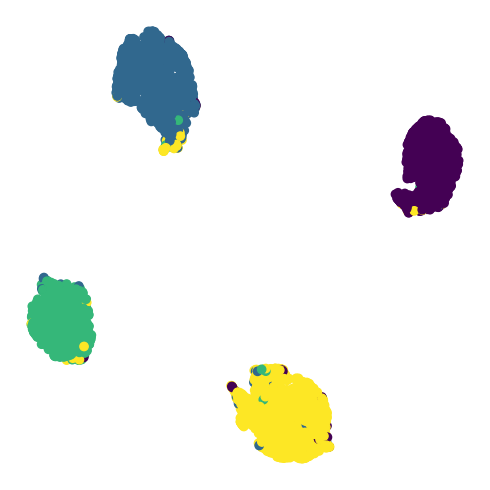

In [4]:
checkpoint_path = "checkpoints_latest/IEMOCAP_losses/_4M_SER_CosFace_bert_vggish/20240320-152652"
cfg_path = os.path.join(checkpoint_path, "cfg.log")
ckpt_path = os.path.join(
    checkpoint_path, "weights/best_acc/checkpoint_0.pth"
)
cfg = Config()
cfg.load(cfg_path)

        
eval_pca(cfg, ckpt_path, three_dim=True, legend=False, all_state_dict=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 4479/4479 [04:44<00:00, 15.72it/s]


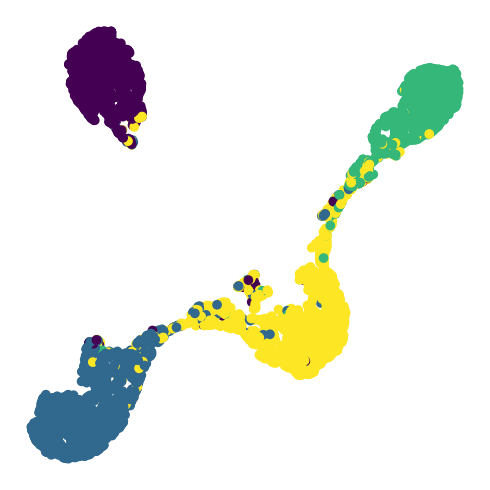

In [5]:
checkpoint_path = "checkpoints_latest/IEMOCAP_losses/_4M_SER_CrossEntropyLoss_CenterLoss_bert_vggish/20240317-094341"
cfg_path = os.path.join(checkpoint_path, "cfg.log")
ckpt_path = os.path.join(
    checkpoint_path, "weights/best_acc/checkpoint_0.pth"
)
cfg = Config()
cfg.load(cfg_path)

        
eval_pca(cfg, ckpt_path, three_dim=True, legend=False, all_state_dict=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 4479/4479 [07:29<00:00,  9.97it/s]


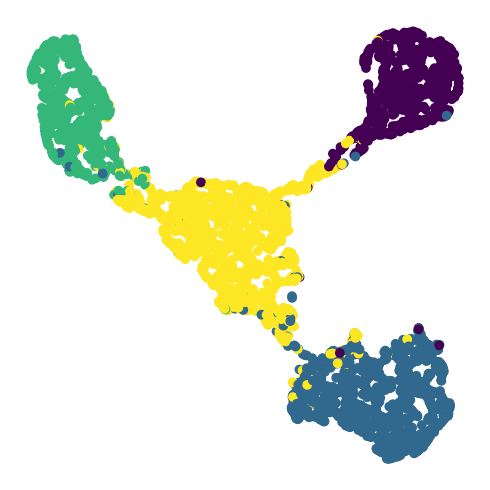

In [6]:
checkpoint_path = "checkpoints_latest/IEMOCAP_losses/_4M_SER_CrossEntropyLoss_ContrastiveCenterLoss_bert_vggish/20240317-094356"
cfg_path = os.path.join(checkpoint_path, "cfg.log")
ckpt_path = os.path.join(
    checkpoint_path, "weights/best_acc/checkpoint_0.pth"
)
cfg = Config()
cfg.load(cfg_path)

        
eval_pca(cfg, ckpt_path, three_dim=True, legend=False, all_state_dict=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 4479/4479 [04:33<00:00, 16.36it/s]


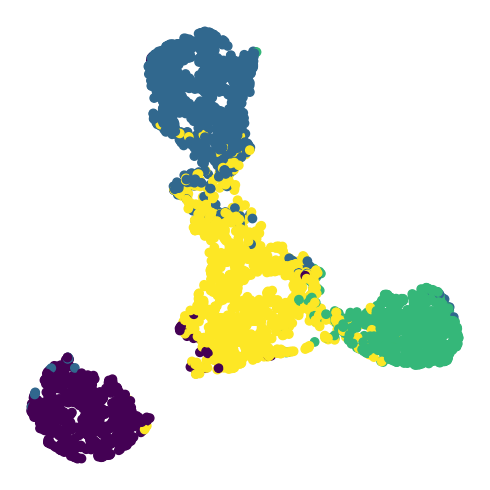

In [7]:
checkpoint_path = "checkpoints_latest/IEMOCAP_losses/_4M_SER_FocalLoss_bert_vggish/20240320-153009"
cfg_path = os.path.join(checkpoint_path, "cfg.log")
ckpt_path = os.path.join(
    checkpoint_path, "weights/best_acc/checkpoint_0.pth"
)
cfg = Config()
cfg.load(cfg_path)

        
eval_pca(cfg, ckpt_path, three_dim=True, legend=False, all_state_dict=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 4479/4479 [04:34<00:00, 16.34it/s]


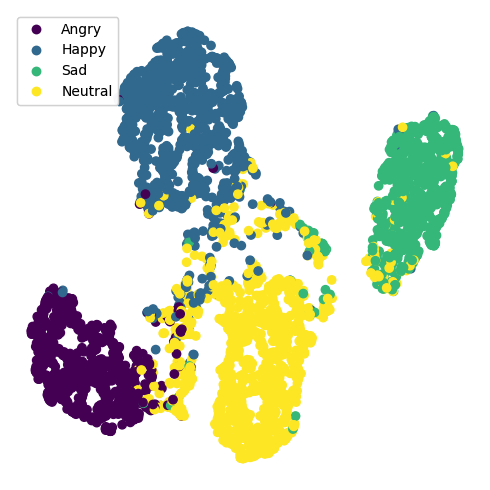

In [8]:
checkpoint_path = "checkpoints_latest/IEMOCAP/_4M_SER_bert_vggish/20240324-231013"
cfg_path = os.path.join(checkpoint_path, "cfg.log")
ckpt_path = os.path.join(
    checkpoint_path, "weights/best_acc/checkpoint_0.pth"
)
cfg = Config()
cfg.load(cfg_path)

        
eval_pca(cfg, ckpt_path, three_dim=True, legend=True, all_state_dict=False)